Part 1: Prep the data in order to be ready to be fed to a model. Look for missing, null, NaN records. Find outliers. Transform data – all entries should be numeric.

Importing of Libraries

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# New Section

Extracting the Data File

In [ ]:
Dataset = r"/content/telco-customer-churn.csv"

dataset = pd.read_csv(Dataset)

In [ ]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(dataset.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
print(dataset.isnull())

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

Data Wrangling
Handling Missing Data

In [ ]:
#Replace the '?' in the data file with Nan
dataset.replace("?", np.nan, inplace=True)

In [ ]:
#Calculating the number of missing data in each column and printing the same
dataset.isnull().sum()
for column in dataset.columns:
    print(column)
    print(dataset[column].isnull().sum())

customerID
0
gender
0
SeniorCitizen
0
Partner
0
Dependents
0
tenure
0
PhoneService
0
MultipleLines
0
InternetService
0
OnlineSecurity
0
OnlineBackup
0
DeviceProtection
0
TechSupport
0
StreamingTV
0
StreamingMovies
0
Contract
0
PaperlessBilling
0
PaymentMethod
0
MonthlyCharges
0
TotalCharges
0
Churn
0


Outliers

In [ ]:
!pip install seaborn

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


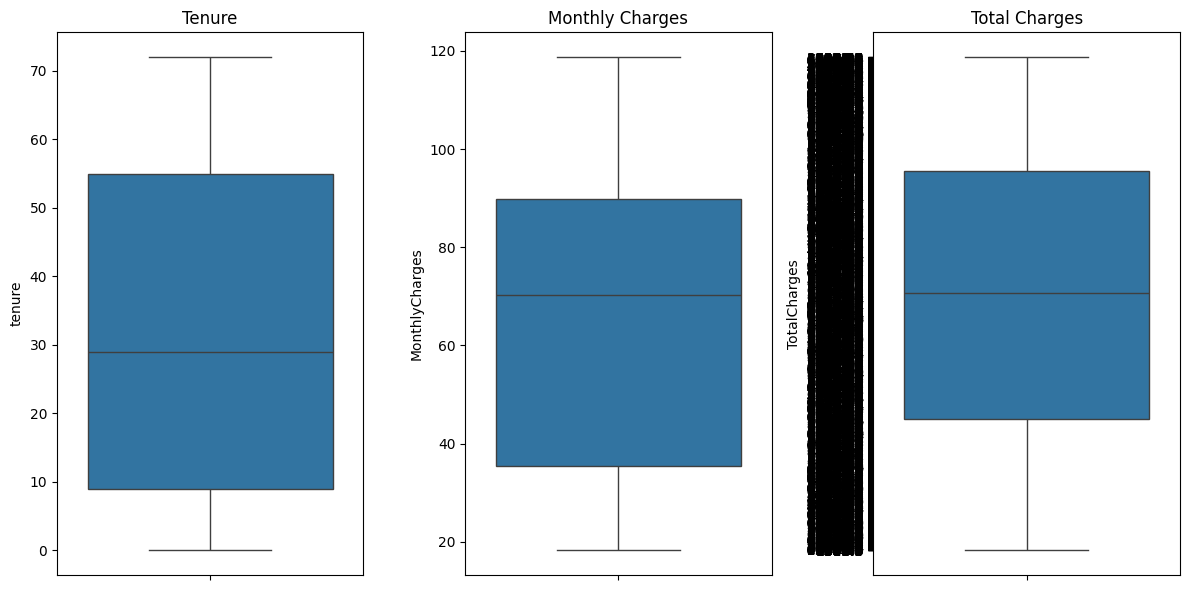

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each numeric column
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(dataset['tenure'])
plt.title('Tenure')

plt.subplot(1, 3, 2)
sns.boxplot(dataset['MonthlyCharges'])
plt.title('Monthly Charges')

plt.subplot(1, 3, 3)
sns.boxplot(dataset['TotalCharges'])
plt.title('Total Charges')

plt.tight_layout()
plt.show()

In [ ]:
!pip install spicy

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming 'dataset' is your DataFrame
for column in numeric_columns:
    column_data = pd.to_numeric(dataset[column], errors='coerce').dropna()  # Convert to numeric and handle errors
    z_scores = stats.zscore(column_data)

    # Use a Z-Score threshold of 2.5 instead of 3
    threshold = 2.5
    outliers = np.where(np.abs(z_scores) > threshold)

    print(f"Outliers for column {column}: {outliers}")


Outliers for column tenure: (array([], dtype=int64),)
Outliers for column MonthlyCharges: (array([], dtype=int64),)
Outliers for column TotalCharges: (array([ 193,  198,  369,  437,  464,  483,  525,  539,  549,  550,  589,
        607,  745,  773,  848,  894,  907, 1058, 1131, 1166, 1276, 1296,
       1302, 1688, 1730, 1741, 1762, 1870, 2020, 2110, 2182, 2262, 2363,
       2445, 2532, 2554, 2598, 2631, 2662, 2684, 2811, 2921, 3102, 3200,
       3242, 3294, 3517, 3761, 3814, 3871, 3883, 3887, 3890, 4019, 4024,
       4148, 4163, 4199, 4222, 4256, 4545, 4554, 4578, 4602, 4612, 4729,
       4758, 4789, 4856, 4877, 5105, 5189, 5310, 5338, 5411, 5528, 5549,
       5733, 5810, 5907, 5986, 6109, 6126, 6297, 6394, 6528, 6557, 6718,
       6757, 6848]),)


Part 2: Listing all types of data, numeric, categorical, text



In [ ]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (usually object type in pandas)
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()

# If there are any text columns (which are also often 'object'), you can refine them here
# Check if any categorical columns are actually text
text_columns = [col for col in categorical_columns if dataset[col].str.contains('[A-Za-z]', na=False).any()]

# Now remove text columns from categorical
categorical_columns = [col for col in categorical_columns if col not in text_columns]

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['TotalCharges']
Text Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Checking Data Format



In [ ]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Convert binary columns to numeric
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
dataset[binary_columns] = dataset[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})

<ipython-input-19-0ca5bf35caf2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[binary_columns] = dataset[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})


In [ ]:
# Convert multi-class categorical columns to numeric codes
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category').cat.codes

In [ ]:
# Convert 'TotalCharges' to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')


In [ ]:
print(dataset.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling      int64
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [ ]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')

In [ ]:
print(dataset.dtypes)

customerID            object
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling       int64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object


In [ ]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (usually object type in pandas)
categorical_columns = dataset.select_dtypes(include=['category']).columns.tolist()

# If there are any text columns (which are also often 'object')
text_columns = dataset.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Text Columns: ['customerID']


In [ ]:
!pip install scikit-learn

import seaborn as sns
from sklearn.model_selection import train_test_split

Part 3: Perform EDA. Present dependencies and correlations among the various features in the data. List the most important variables (Feature Importance) that will affect the target label.

In [ ]:
3.1 Data Cleaning


In [ ]:
print("Missing values in each column:")
print(dataset.isnull().sum())

Missing values in each column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Removing values / Dropping Values

In [ ]:
df_rows_dropped = dataset.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_rows_dropped.head())

# Dropping columns with any missing values
df_columns_dropped = dataset.dropna(axis=1)
print("\nDataFrame after dropping columns with missing values:")
print(df_columns_dropped.head())


DataFrame after dropping rows with missing values:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0             0             1               0              0  ...   
1             1             0               0              2  ...   
2             1             0               0              2  ...   
3             0             1               0              2  ...   
4             1             0               1              0  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
0                0           0           0     

In [ ]:
# Original number of rows
original_row_count = dataset.shape[0]

# Dropping rows with missing values
df_rows_dropped = dataset.dropna()

# Number of rows after dropping
new_row_count = df_rows_dropped.shape[0]

# Number of rows dropped
rows_dropped = original_row_count - new_row_count

# Print results
print(f"Original number of rows: {original_row_count}")
print(f"Number of rows after dropping: {new_row_count}")
print(f"Number of rows dropped: {rows_dropped}")

# Display the resulting DataFrame
print("\nDataFrame after dropping rows with missing values:")
print(df_rows_dropped.head())


Original number of rows: 7043
Number of rows after dropping: 7032
Number of rows dropped: 11

DataFrame after dropping rows with missing values:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0             0             1               0              0  ...   
1             1             0               0              2  ...   
2             1             0               0              2  ...   
3             0             1               0              2  ...   
4             1             0               1              0  ...   

  DeviceProtection TechSu

3.2 Univariate Analysis

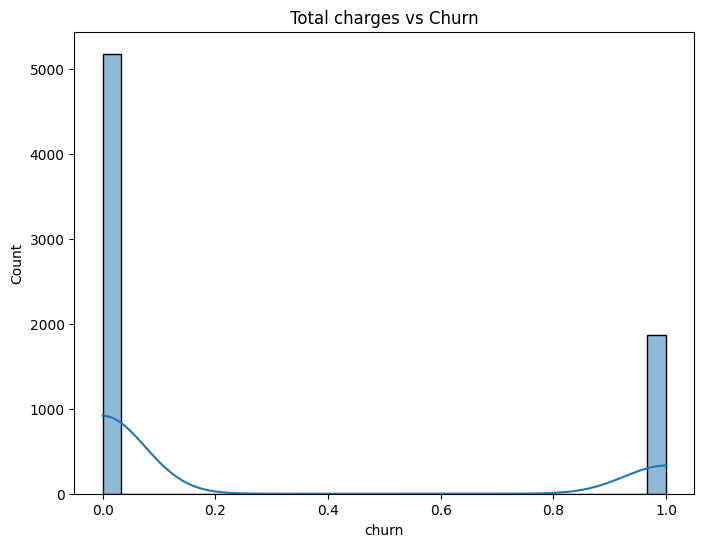

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Churn'], kde=True, bins=30)
plt.title('Total charges vs Churn')
plt.xlabel('churn')
plt.show()
plt.figure(figsize=(8, 6))


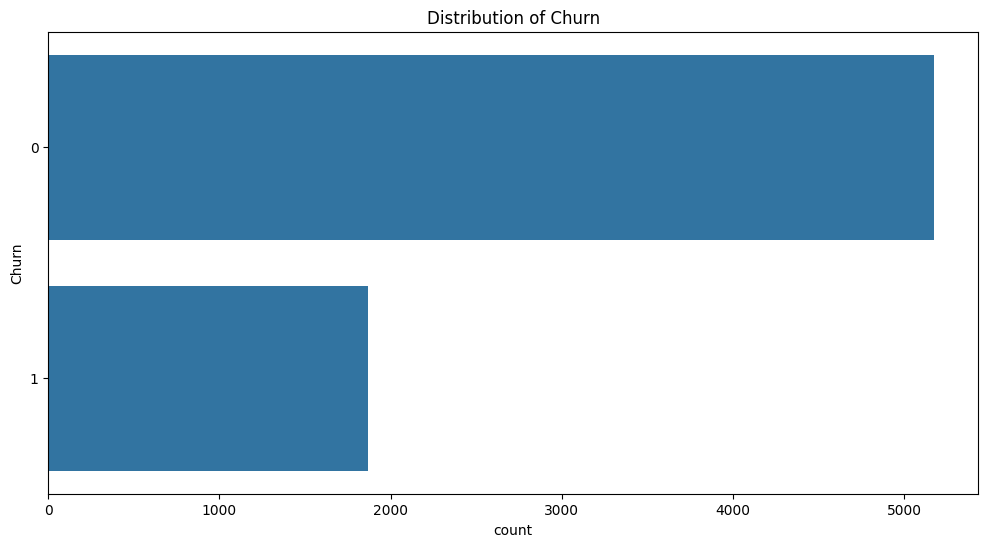

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Replace 'Make' with the actual column name you intend to plot
sns.countplot(y='Churn', data=dataset, order=dataset['Churn'].value_counts().index)

plt.title('Distribution of Churn')
plt.show()


Calculate churn rate

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


<ipython-input-33-525c49b44453>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Churn', palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


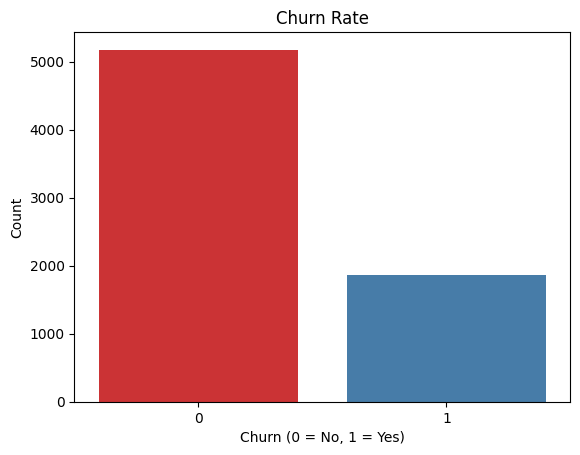

In [ ]:
# Calculate churn rate
churn_rate = dataset['Churn'].value_counts(normalize=True)
print(churn_rate)

# Visualize churn rate
sns.countplot(data=dataset, x='Churn', palette='Set1')
plt.title('Churn Rate')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
data_numeric = dataset.drop(columns=['customerID'])  # Drop non-numeric identifiers

Bivariate Analysis
cross tabulation-  process of representing the relationship between two or more categorical variables using visual aids. The goal is to show how the categories of one variable relate to those of another and to make the interpretation of their interaction easier.



Churn         0  1
TotalCharges      
18.80         1  0
18.85         1  1
18.90         1  0
19.00         1  0
19.05         1  0
...          .. ..
8564.75       1  0
8594.40       1  0
8670.10       1  0
8672.45       1  0
8684.80       0  1

[6530 rows x 2 columns]


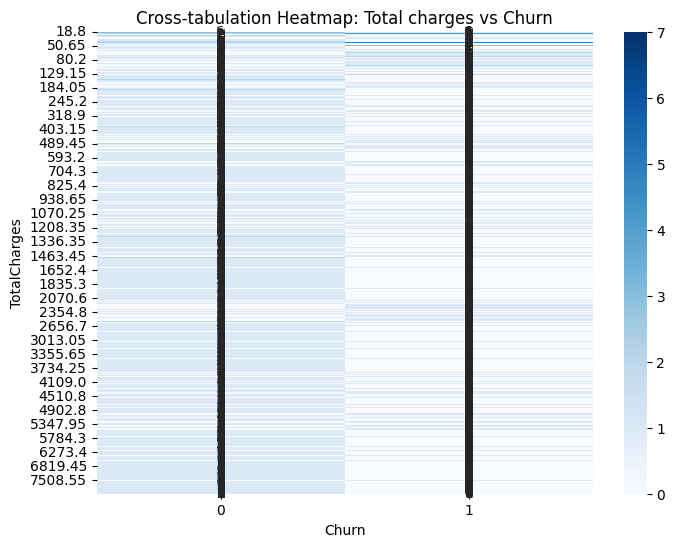

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
crosstab_result = pd.crosstab(dataset['TotalCharges'], dataset['Churn'])
print(crosstab_result)
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_result, annot=True, cmap='Blues', fmt='g')
plt.title('Cross-tabulation Heatmap: Total charges vs Churn')
plt.show()

Positive Correlations: MonthlyCharges: 0.193; PaperlessBilling: 0.192; SeniorCitizen: 0.151

Part 4: Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’ command contrast the training vs test datasets on the target (‘churn’)

Churn                   0    1
TotalCharges_Binned           
0-500                1171  829
500-1000              652  241
1000-2000            1014  269
2000-3000             472  180
3000-4000             449  107
4000-5000             427   86
5000-6000             374   69


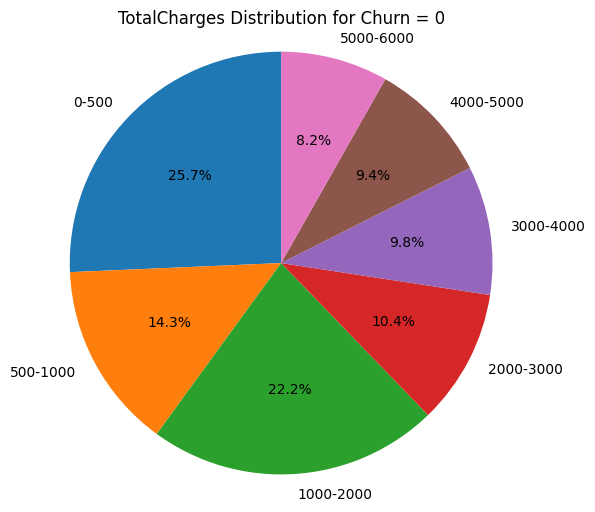

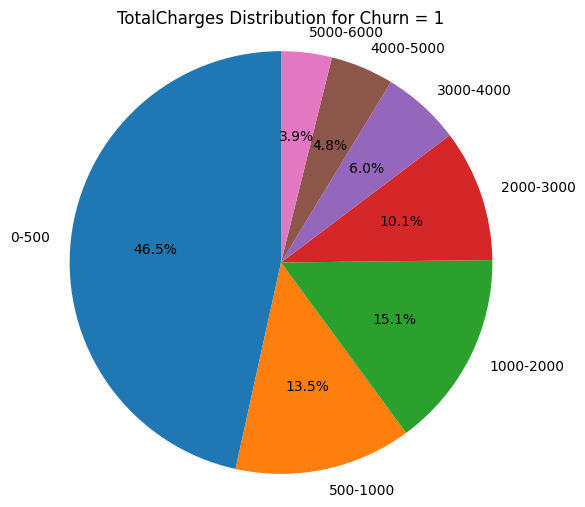

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin TotalCharges into categories (adjust bins as necessary)
dataset['TotalCharges_Binned'] = pd.cut(dataset['TotalCharges'], bins=[0, 500, 1000, 2000, 3000, 4000, 5000, 6000], labels=['0-500', '500-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000'])

# Cross-tabulation between the binned TotalCharges and Churn
crosstab_result = pd.crosstab(dataset['TotalCharges_Binned'], dataset['Churn'])
print(crosstab_result)

# Loop through each Churn category to create pie charts
for churn_category in crosstab_result.columns:
    plt.figure(figsize=(6, 6))

    # Plot pie chart for each Churn category
    plt.pie(crosstab_result[churn_category], labels=crosstab_result.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'TotalCharges Distribution for Churn = {churn_category}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [ ]:
import pandas as pd

# Assuming 'dataset' is your DataFrame

# Convert non-numeric values to NaN for the entire DataFrame
dataset_cleaned = dataset.apply(pd.to_numeric, errors='coerce')

# Now compute the correlation matrix on the cleaned dataset
correlation_matrix = dataset_cleaned.corr()

print(correlation_matrix)


                     customerID    gender  SeniorCitizen   Partner  \
customerID                  NaN       NaN            NaN       NaN   
gender                      NaN  1.000000       0.001874  0.001808   
SeniorCitizen               NaN  0.001874       1.000000  0.016479   
Partner                     NaN  0.001808       0.016479  1.000000   
Dependents                  NaN -0.010517      -0.211185  0.452676   
tenure                      NaN -0.005106       0.016567  0.379697   
PhoneService                NaN  0.006488       0.008576  0.017706   
MultipleLines               NaN  0.006739       0.146185  0.142410   
InternetService             NaN  0.000863      -0.032310  0.000891   
OnlineSecurity              NaN  0.015017      -0.128221  0.150828   
OnlineBackup                NaN  0.012057      -0.013632  0.153130   
DeviceProtection            NaN -0.000549      -0.021398  0.166330   
TechSupport                 NaN  0.006825      -0.151268  0.126733   
StreamingTV         

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 67.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
import sweetviz as sv

In [ ]:
# Define the features (X) and the target (y)
X = dataset.drop(columns=['Churn'])  # Drop the 'Churn' column
y = dataset['Churn']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine the training and test data back with their respective labels for SweetViz
train_data = X_train.copy()
train_data['Churn'] = y_train

test_data = X_test.copy()
test_data['Churn'] = y_test

In [ ]:
# Step 1: Uninstall existing versions of numpy and numba
!pip uninstall -y numpy numba

# Step 2: Install a compatible version of numpy
!pip install numpy==1.23.5 numba==0.60.0

# Step 3: Reinstall ydata-profiling (or sweetviz if needed)
!pip install ydata-profiling

# Step 4: Patch the library code to remove references to 'VisibleDeprecationWarning'
import os
import sys

# Locate the file that references VisibleDeprecationWarning in the ydata-profiling package
library_path = os.path.join(sys.prefix, 'Lib', 'site-packages', 'ydata_profiling')
if os.path.exists(library_path):
    for root, dirs, files in os.walk(library_path):
        for file in files:
            if file.endswith(".py"):
                with open(os.path.join(root, file), 'r') as code_file:
                    content = code_file.read()
                if 'VisibleDeprecationWarning' in content:
                    # Replace 'VisibleDeprecationWarning' with 'DeprecationWarning'
                    content = content.replace('VisibleDeprecationWarning', 'DeprecationWarning')
                    with open(os.path.join(root, file), 'w') as code_file:
                        code_file.write(content)

# Step 5: Import the necessary libraries
from ydata_profiling import ProfileReport

# Assuming 'dataset' is already loaded as your DataFrame
# Step 6: Create the profile report
profile = ProfileReport(dataset, title="Telco Customer Churn - Pandas Profiling Report", explorative=True)

# Step 7: Save the report as an HTML file
profile.to_file("ydata_profiling_report.html")

print("Pandas Profiling report has been generated and saved as 'ydata_profiling_report.html'")

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.1 MB/s eta 0:00:00
Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.21.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a90146dbb3abd0c6f6eef7ecd096dc8ebbab36fc715e8ccb315afb72302a528e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report has been generated and saved as 'ydata_profiling_report.html'
